In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from FindDataFunctions import *

In [134]:
# paths = ["/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/VaryOrigDest21398Seed/10000reqs/3000dist/1.0frac_comm_orig_dest/150drt/unimodal/ITERS/it.0/0.drt_park_tracking.csv.gz",
#          "/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/VaryOrigDestDiscrete123Seed/10000reqs/3000dist/1.0frac_comm_orig_dest/150drt/unimodal/ITERS/it.0/0.drt_park_tracking.csv.gz",
#          "/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/VaryOrigDestDiscrete42Seed/10000reqs/3000dist/1.0frac_comm_orig_dest/150drt/unimodal/ITERS/it.0/0.drt_park_tracking.csv.gz"]

seeds = ["12","34","42","45","65","542","423","84","6319","84523"]

last_coords = []
occupancies = []

for seed in seeds:
    path = f"/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/VaryOrigDestUniformSeed{seed}/10000reqs/2500dist/1.0frac_comm_orig_dest/150drt/unimodal/ITERS/it.0/0.drt_park_tracking.csv.gz"
    df = pd.read_csv(path).sort_values("startTimePark")
    last_coords.append(df.groupby("VehId").tail(1))
    #TODO get average b and draw distance
    test = {}
    test["drt_occupancy"] = f"/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/VaryOrigDestUniformSeed{seed}/10000reqs/2500dist/1.0frac_comm_orig_dest/150drt/unimodal/ITERS/it.0/0.drt_occupancy_time_profiles_drt.txt"
    occupancy_non_idling, _ = getDrtOccupandyAndStandingFrac(test, False, False)
    occupancies.append(occupancy_non_idling)

G = nx.generators.lattice.grid_2d_graph(21, 21)
pos = {n: 500*np.array(n) for n in G.nodes()}

x = pd.concat([l["X"] for l in last_coords])
y = pd.concat([l["Y"] for l in last_coords])

occupancies = np.array(occupancies)
av_occ = np.mean(occupancies)
std_occ = np.std(occupancies)
print(av_occ, std_occ)

4.298736657930474 0.03827744235530721


In [140]:
ex_ring_r = av_occ/(av_occ + 1) * 2500
ex_ring_r = 2500

In [135]:
nodes = list(G.nodes)
e_to_add1 = [((n[0], n[1]), (n[0]+1, n[1]+1)) for n in nodes if isinstance(n, tuple) and n[0]<20 and n[1]<20]
e_to_add2 = [((n[0], n[1]), (n[0]+1, n[1]-1)) for n in nodes if isinstance(n, tuple) and n[0]<20 and n[1]>0]

In [136]:
G.add_edges_from(e_to_add1)
G.add_edges_from(e_to_add2)

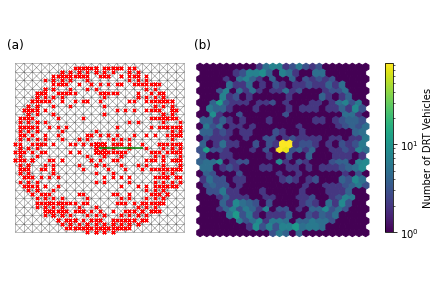

In [141]:
%matplotlib inline
fig, axes = plt.subplots(1,2,constrained_layout=True)

ax = axes[0]
ax.axis('equal')
ax.scatter(x, y, c='red', zorder=-1, s=10, marker="x")
xlims = ax.get_xlim()
# l = ax.figure.subplotpars.left
# r = ax.figure.subplotpars.right
# t = ax.figure.subplotpars.top
# b = ax.figure.subplotpars.bottom
# print(xlims)
# nx.draw(G, pos=pos, node_size=1, alpha=0.5, ax=ax)
# nodes = nx.draw_networkx_nodes(G, pos, node_size=1, alpha=0.5, node_color='black', ax=ax)
edges = nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5, edge_color='black', ax=ax)
# nodes.set_zorder(-2)
edges.set_zorder(-2)
ax.axis('off')
# print(ax.get_xlim())
ax.set_xlim(xlims)
# print(ax.get_xlim())
# print(r-l, t-b)
# ax.figure.set_size_inches(r-l, t-b)
ax.plot([0,10000], [0,10000], ls="")
# ax.plot([5000, 5000+ex_ring_r],[5000, 5000], c="green")

ax.text(0.0, 0.85, "(a)", transform=ax.transAxes, fontsize="large")

ax.set_rasterization_zorder(0)

ax = axes[1]
ax.axis('equal')
im = ax.hexbin(x, y, gridsize=25, bins="log", zorder=-1)#, alpha=0.5)
ax.plot([0,10000], [0,10000], ls="")
ax.axis('off')

ax.text(0.0, 0.85, "(b)", transform=ax.transAxes, fontsize="large")

fig.colorbar(im, ax=ax, shrink=0.6, label="Number of DRT Vehicles")

# fig.savefig("Figures/ParkingVehicleDistrUniform.pgf", dpi=300)
# fig.savefig("Figures/ParkingVehicleDistrDiscrete.pgf", dpi=300)
# fig.savefig("Figures/ParkingVehicleDistrInvGamma.pgf", dpi=300)

plt.show()